In [67]:
import tensorflow as tf

tf.compat.v1.disable_eager_execution()

from keras.datasets import mnist
from tensorflow.python.keras.layers import *
from tensorflow.python.keras.layers.advanced_activations import LeakyReLU
from tensorflow.python.keras.models import Sequential,Model
from tensorflow.compat.v1.keras.optimizers import Adam

import matplotlib.pyplot as plt
import math
import numpy as np

In [68]:
(X_train,_),(_,_) = mnist.load_data()

In [69]:
X_train.shape

(60000, 28, 28)

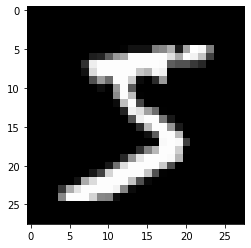

In [70]:
plt.imshow(X_train[0],cmap='gray')
plt.show()

In [71]:
#Normalise data in [-1,1] range
X_train = (X_train.astype('float32') - 127.5)/127.5
print(np.min(X_train))
print(np.max(X_train))
print(X_train.shape)

-1.0
1.0
(60000, 28, 28)


In [81]:
EPOCHS=50
BATCH_SIZE=256 #no of images passed through discriminator in eatch batch
BATCH_NO = int(X_train.shape[0]/BATCH_SIZE)#no of batches in one epoch
HALF_BATCH = 128
NOISE_DIM = 100 #Later converted to 784 vector by UpSampling
adam = Adam(learning_rate=2e-4, beta_1=0.5) #Optimal parameter

In [82]:
generator = Sequential()
generator.add(Dense(256,input_shape=(NOISE_DIM,)))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784,activation='tanh'))

generator.compile(loss='binary_crossentropy',optimizer=adam)
generator.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_43 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_44 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_45 (LeakyReLU)   (None, 1024)              0         
_________________________________________________________________
dense_54 (Dense)             (None, 784)             

In [83]:
discriminator = Sequential()
discriminator.add(Dense(512,input_shape=(784,)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1,activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy',optimizer=adam)

discriminator.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_46 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_47 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [84]:
# GAN (Step-2)
discriminator.trainable = False
gan_input = Input(shape=(NOISE_DIM,))
generated_img = generator(gan_input)
gan_output = discriminator(generated_img)

# Functional API
model = Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)

In [86]:
X_train = X_train.reshape(-1,784)
print(X_train.shape)

def save_imgs(epoch,samples=100):
    
    noise = np.random.normal(0,1,size=(samples,NOISE_DIM))
    generated_imgs = generator.predict(noise)
    generated_imgs = generated_imgs.reshape(samples,28,28)
    
    plt.figure(figsize=(10,10))
    for i in range(samples):
        plt.subplot(10,10,i+1)
        plt.imshow(generated_imgs[i],interpolation='nearest',cmap='gray')
        plt.axis("off")
        
    plt.tight_layout()
    plt.savefig('images/gan_output_epoch_{0}.png'.format(epoch+1))
    plt.show()

(60000, 784)


Epoch 1 Disc Loss 0.5695 Generator Loss 1.3231
Epoch 2 Disc Loss 0.5639 Generator Loss 1.3238
Epoch 3 Disc Loss 0.5758 Generator Loss 1.2639
Epoch 4 Disc Loss 0.5917 Generator Loss 1.2333
Epoch 5 Disc Loss 0.6054 Generator Loss 1.1946


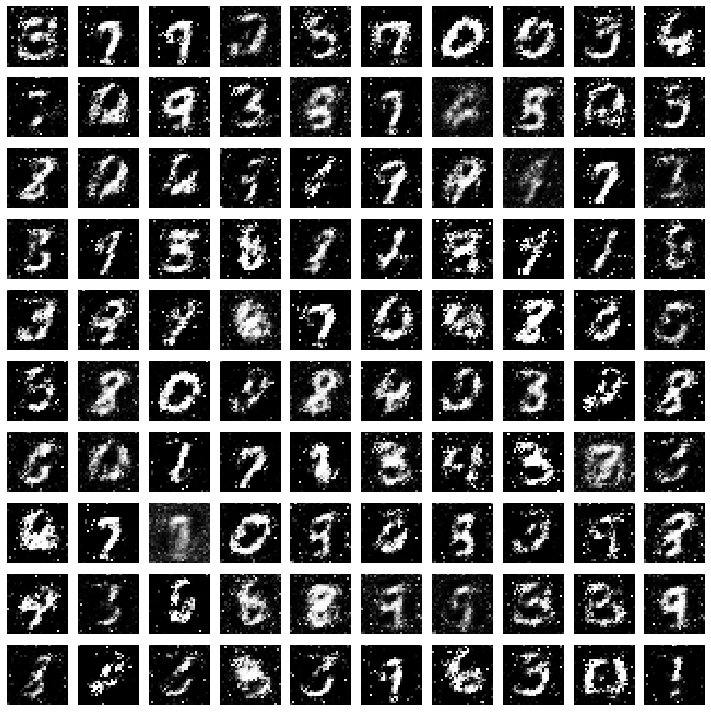

Epoch 6 Disc Loss 0.6314 Generator Loss 1.1019
Epoch 7 Disc Loss 0.6323 Generator Loss 1.0787
Epoch 8 Disc Loss 0.6378 Generator Loss 1.0510
Epoch 9 Disc Loss 0.6394 Generator Loss 1.0388
Epoch 10 Disc Loss 0.6399 Generator Loss 1.0347


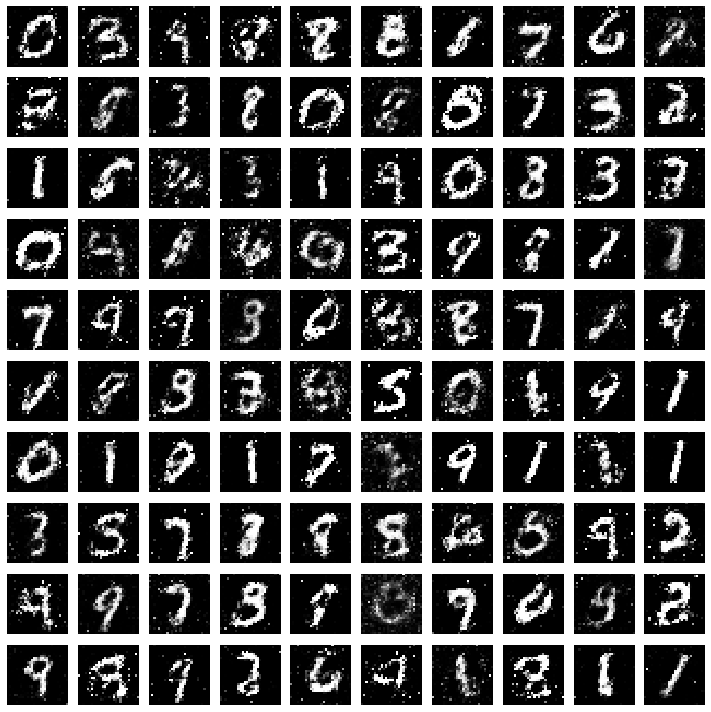

Epoch 11 Disc Loss 0.6416 Generator Loss 1.0407
Epoch 12 Disc Loss 0.6403 Generator Loss 1.0404
Epoch 13 Disc Loss 0.6404 Generator Loss 1.0409
Epoch 14 Disc Loss 0.6459 Generator Loss 1.0293
Epoch 15 Disc Loss 0.6500 Generator Loss 1.0222


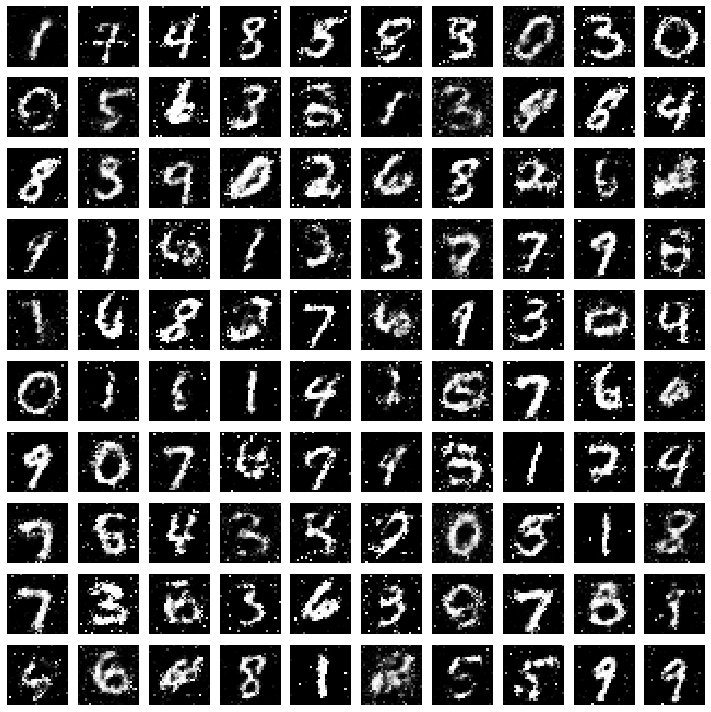

Epoch 16 Disc Loss 0.6521 Generator Loss 1.0139
Epoch 17 Disc Loss 0.6507 Generator Loss 1.0202
Epoch 18 Disc Loss 0.6538 Generator Loss 1.0156
Epoch 19 Disc Loss 0.6506 Generator Loss 1.0214
Epoch 20 Disc Loss 0.6518 Generator Loss 1.0146


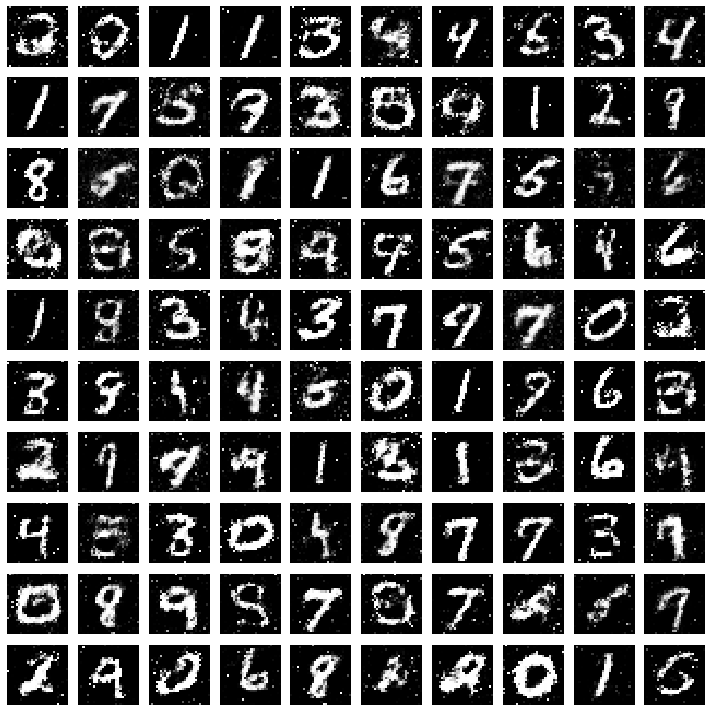

Epoch 21 Disc Loss 0.6525 Generator Loss 1.0153
Epoch 22 Disc Loss 0.6560 Generator Loss 1.0204
Epoch 23 Disc Loss 0.6550 Generator Loss 1.0166
Epoch 24 Disc Loss 0.6558 Generator Loss 1.0139
Epoch 25 Disc Loss 0.6575 Generator Loss 1.0100


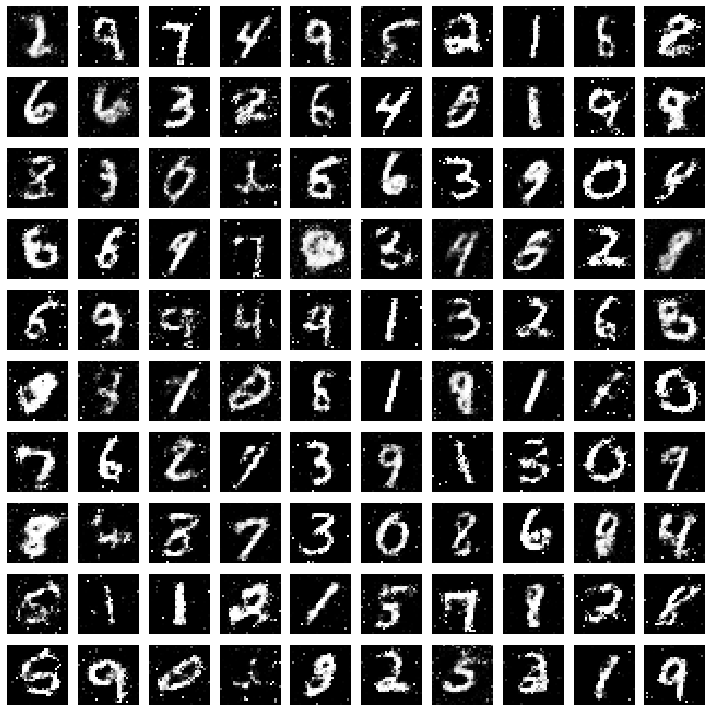

Epoch 26 Disc Loss 0.6567 Generator Loss 1.0117
Epoch 27 Disc Loss 0.6563 Generator Loss 1.0167
Epoch 28 Disc Loss 0.6565 Generator Loss 1.0134
Epoch 29 Disc Loss 0.6563 Generator Loss 1.0147
Epoch 30 Disc Loss 0.6599 Generator Loss 1.0105


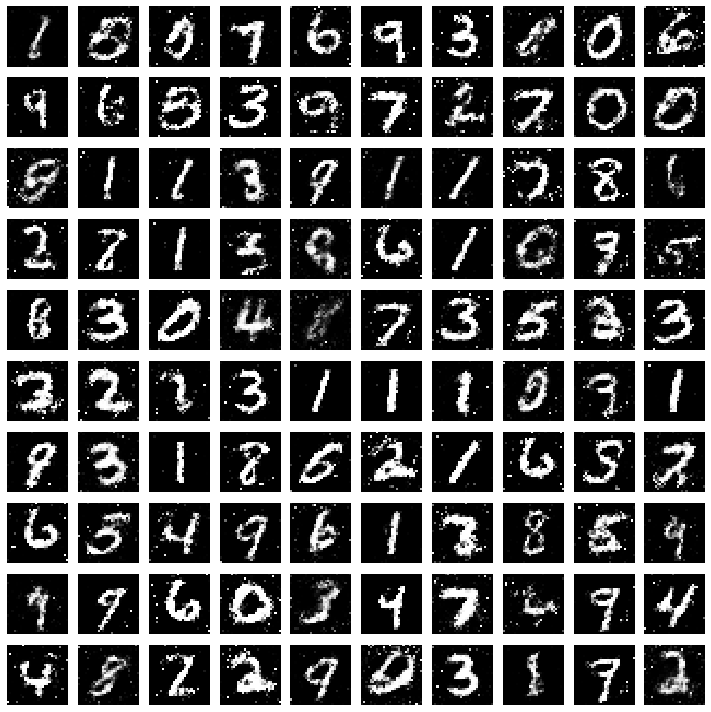

Epoch 31 Disc Loss 0.6596 Generator Loss 1.0081
Epoch 32 Disc Loss 0.6601 Generator Loss 0.9986
Epoch 33 Disc Loss 0.6609 Generator Loss 1.0040
Epoch 34 Disc Loss 0.6590 Generator Loss 0.9984
Epoch 35 Disc Loss 0.6594 Generator Loss 1.0096


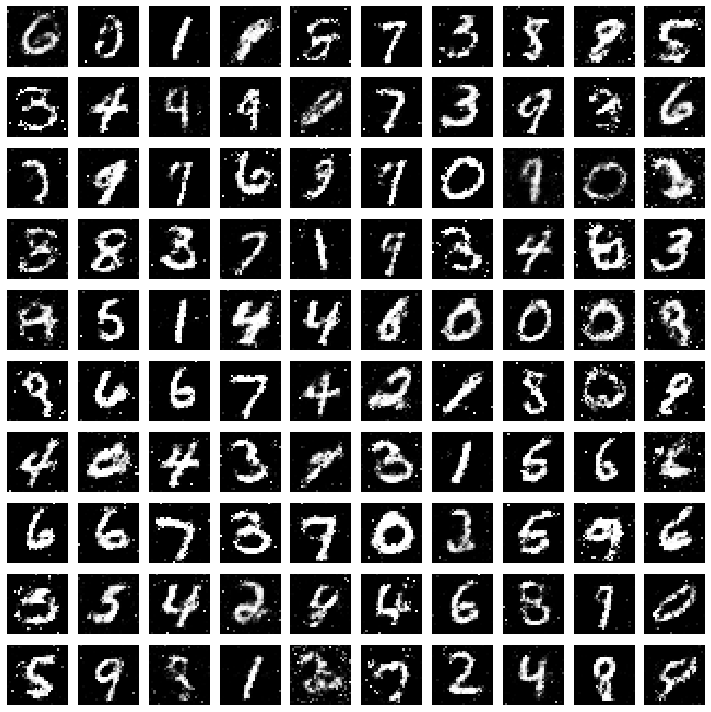

Epoch 36 Disc Loss 0.6606 Generator Loss 1.0075
Epoch 37 Disc Loss 0.6624 Generator Loss 0.9961
Epoch 38 Disc Loss 0.6612 Generator Loss 1.0010
Epoch 39 Disc Loss 0.6610 Generator Loss 1.0033
Epoch 40 Disc Loss 0.6616 Generator Loss 0.9996


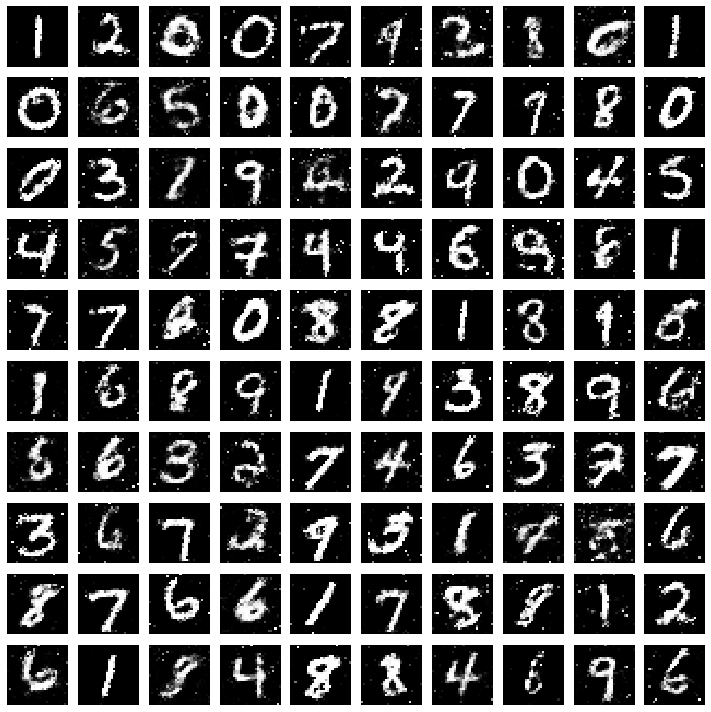

Epoch 41 Disc Loss 0.6605 Generator Loss 0.9992
Epoch 42 Disc Loss 0.6610 Generator Loss 0.9996
Epoch 43 Disc Loss 0.6613 Generator Loss 1.0000
Epoch 44 Disc Loss 0.6596 Generator Loss 1.0025
Epoch 45 Disc Loss 0.6609 Generator Loss 1.0072


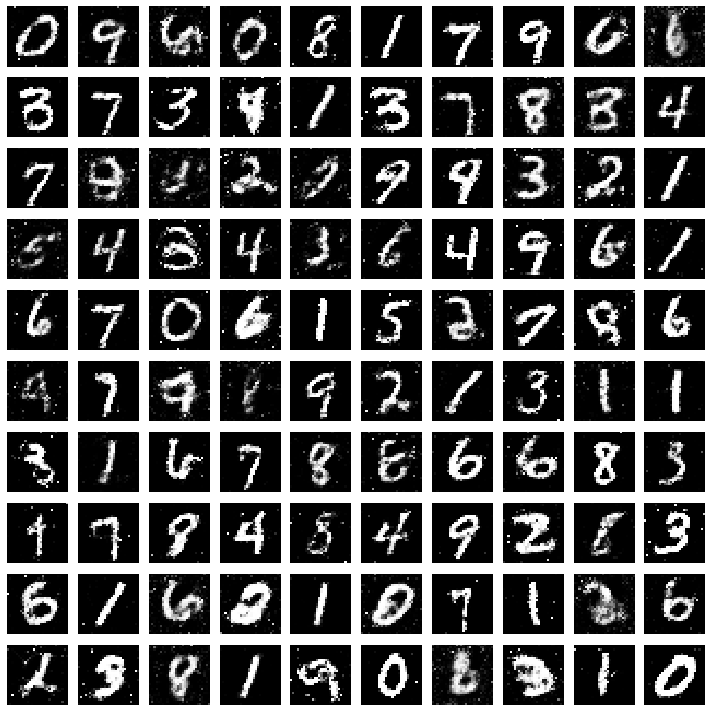

Epoch 46 Disc Loss 0.6610 Generator Loss 1.0030
Epoch 47 Disc Loss 0.6611 Generator Loss 1.0016
Epoch 48 Disc Loss 0.6604 Generator Loss 1.0060
Epoch 49 Disc Loss 0.6605 Generator Loss 1.0053


In [ ]:
d_losses = []
g_losses = []


for epoch in range(EPOCHS):
    epoch_d_loss = 0.
    epoch_g_loss = 0.
    
    #Mini Batch SGD
    for step in range(BATCH_NO):
        
        # Step-1 Discriminator 
        # 50% Real Data + 50% Fake Data
        
        #Real Data X
        idx = np.random.randint(0,X_train.shape[0],HALF_BATCH)
        real_imgs = X_train[idx]
        
        #Fake Data X
        noise = np.random.normal(0,1,size=(HALF_BATCH,NOISE_DIM))
        fake_imgs = generator.predict(noise) #Forward 
        
        
        # Labels 
        real_y = np.ones((HALF_BATCH,1))*0.9 #One Side Label Smoothing for Discriminator
        fake_y = np.zeros((HALF_BATCH,1))
        
        # Train our Discriminator
        d_loss_real = discriminator.train_on_batch(real_imgs,real_y)
        d_loss_fake = discriminator.train_on_batch(fake_imgs,fake_y)
        d_loss = 0.5*d_loss_real + 0.5*d_loss_fake
        
        epoch_d_loss += d_loss
        
        # Train Generator (Considering Frozen Discriminator)
        noise = np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
        ground_truth_y = np.ones((BATCH_SIZE,1))
        g_loss = model.train_on_batch(noise,ground_truth_y)
        epoch_g_loss += g_loss
        
    print("Epoch %d Disc Loss %.4f Generator Loss %.4f" %((epoch+1),epoch_d_loss/BATCH_NO,epoch_g_loss/BATCH_NO))
    d_losses.append(epoch_d_loss/BATCH_NO)
    g_losses.append(epoch_g_loss/BATCH_NO)
    
    if (epoch+1)%5==0:
        generator.save('model/gan_generator_{0}.h5'.format(epoch+1))
        save_imgs(epoch)

In [ ]:
plt.plot(d_losses,label='Disc')
plt.plot(g_lossess,label='Gen')
plt.legend()
plt.show()